In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydot

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np 
from sklearn.metrics import accuracy_score

class Model:
    def __init__(self):
        self.model = None
        self.target = None
        self.features = None
        self.data = None
        self.testX = None
        self.testY = None
        self.trainX = None
        self.trainY = None
        
    def _readDataset(self, filename):
        self.data = pd.read_csv(filename)

    def _dropNulls(self):
        self.data.drop(["education"], axis = 1, inplace = True) #dropping this improved accuracy
        self.data.dropna(inplace = True)
    
    def _saveProcessedData(self):
        self.features = self.data.drop("TenYearCHD", axis = 1)
        self.target = self.data.TenYearCHD

    def _trainTestSplit(self):
        self.trainX, self.testX, self.trainY, self.testY = train_test_split(self.features, self.target, test_size=0.2)
    
    def preProcessing(self, filename):
        self._readDataset(filename)
        self._dropNulls()
        self.data.reset_index(drop = True)
        self._saveProcessedData()
        self._trainTestSplit()
        #display(self.data.corr())

In [31]:
tree1 = DecisionTreeClassifier(max_depth = 5)
model = Model()
model.preProcessing("framingham.csv")

tree1.fit(model.trainX, model.trainY)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(150.66000000000003, 199.32, 'X[1] <= 46.5\ngini = 0.262\nsamples = 2999\nvalue = [2535, 464]'),
 Text(65.286, 163.07999999999998, 'X[9] <= 152.75\ngini = 0.127\nsamples = 1249\nvalue = [1164, 85]'),
 Text(33.480000000000004, 126.83999999999999, 'X[11] <= 39.815\ngini = 0.112\nsamples = 1175\nvalue = [1105, 70]'),
 Text(20.088, 90.6, 'X[8] <= 437.0\ngini = 0.109\nsamples = 1172\nvalue = [1104, 68]'),
 Text(13.392000000000001, 54.359999999999985, 'X[3] <= 9.5\ngini = 0.108\nsamples = 1171\nvalue = [1104, 67]'),
 Text(6.696000000000001, 18.119999999999976, 'gini = 0.067\nsamples = 607\nvalue = [586, 21]'),
 Text(20.088, 18.119999999999976, 'gini = 0.15\nsamples = 564\nvalue = [518, 46]'),
 Text(26.784000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(46.87200000000001, 90.6, 'X[10] <= 95.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(40.176, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(53.568000000000005, 54.3599999999

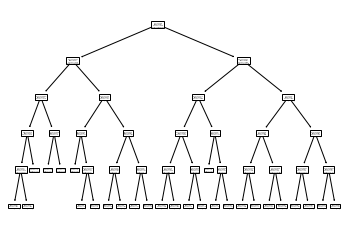

In [32]:
tree.plot_tree(tree1.fit(model.trainX, model.trainY))

In [33]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus 

# export_graphviz(tree, out_file="tree_nonlimited.dot",  
  #              filled=True, rounded=True,
   #             special_characters=True)

dot_data = tree.export_graphviz(tree1, out_file=None, 
                      feature_names=list(model.features.columns), class_names = ["0", "1"])
graph = graphviz.Source(dot_data)  
graph.render('final')
#Image(filename = 'tree_nonlimited.png')

'C:\Users\Mudasir' is not recognized as an internal or external command,
operable program or batch file.


CalledProcessError: Command '['dot.bat', '-Tpdf', '-O', 'final']' returned non-zero exit status 1. [stderr: b"'C:\\Users\\Mudasir' is not recognized as an internal or external command,\r\noperable program or batch file.\r\n"]